# Criando Imagens GroundTruth

Este notebook é responsável por gerar as **máscaras de referência (ground truth)** das áreas queimadas, a partir das imagens e índices espectrais já processados nos passos anteriores do projeto. Essas máscaras serão usadas depois para **avaliar a qualidade** dos métodos de segmentação (K-means, FCM, QFFCM etc.).

De forma resumida, o fluxo é:

1. **Carregamento dos dados**
   - Importa as bibliotecas necessárias.
   - Lê os arquivos `.npz` com as diferenças de índices (`diff_ndvi`, `diff_nbr`, `diff_nbrswir`) para uma imagem/incêndio específico.
   - Opcionalmente, carrega também uma composição RGB para servir de referência visual.

2. **Inspeção visual dos índices**
   - Plota os mapas de diferença dos índices para destacar regiões alteradas pelo fogo.
   - Ajuda a identificar, visualmente, onde a área queimada está localizada.

3. **Criação da máscara de área queimada**
   - Define **limiares** sobre um ou mais índices (por exemplo, queda de NDVI e variação de NBR/NBRSWIR).
   - Combina esses critérios para gerar uma **máscara binária inicial** (queimado / não queimado).

4. **Refinamento da máscara**
   - Sobrepõe a máscara à imagem e ajusta parâmetros até obter uma delimitação coerente da área queimada.
   - Pode aplicar filtros simples (remoção de ruído, eliminação de manchas pequenas, preenchimento de buracos).

5. **Salvamento do ground truth**
   - Salva a máscara final em arquivo (matriz binária e/ou raster georreferenciado).
   - Atualiza os registros indicando qual imagem/incêndio possui ground truth associado.

---

Em essência, este notebook transforma as diferenças de índices espectrais em uma **máscara de referência confiável** da área queimada, que servirá como base para comparar e validar os algoritmos de segmentação utilizados no projeto.


## Bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importando arquivos:

In [ ]:
item = 8 # Escolhendo o índice da imagem desejada

linha = item


data = np.load(f"Imagens_e_indices/Image[{linha}]/Image[{linha}]indices_diff.npz")   # Caminho para arquivo contendo as imagens
               
diff_ndvi = data["diff_ndvi"] 
diff_nbr  = data["diff_nbr"]
diff_nbrswir = data["diff_nbrswir"]

## Gerando as Mascaras Binárias para cada Índice Espectral:

### NDVI

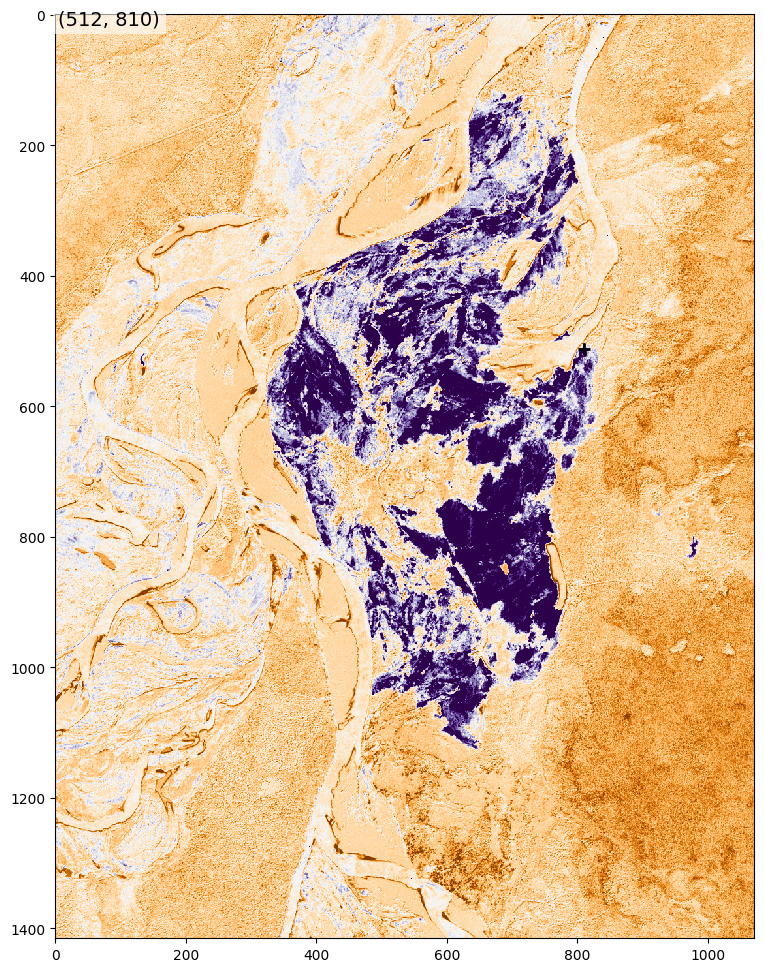

Valor NDVI no pixel (linha=512, coluna=810): 0.1699208723157353


In [271]:
# Se diff_nbr ainda for 1D, garanta que ele já foi convertido para 2D antes daqui.

fig, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(
    diff_ndvi,
    cmap="PuOr",
    vmin=-0.15,
    vmax=0.25,
    interpolation='nearest'
)

ax.set_xlabel("")
ax.set_ylabel("")

# Marcar um pixel específico (linha, coluna) com um 'X'
linha_alvo_ndvi, coluna_alvo_ndvi = 512, 810

ax.plot(coluna_alvo_ndvi, linha_alvo_ndvi, marker='+', color='black',
        markersize=9, markeredgewidth=2)

# Adicionar legenda das coordenadas (canto superior esquerdo)
ax.text(
    5, 15,                             # posição em pixels dentro da imagem
    f"({linha_alvo_ndvi}, {coluna_alvo_ndvi})",  # texto exibido
    color="black",
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')  # fundo discreto
)

plt.show()

# Obter valor do pixel
valor_pixel = diff_ndvi[linha_alvo_ndvi, coluna_alvo_ndvi]
print(f"Valor NDVI no pixel (linha={linha_alvo_ndvi}, coluna={coluna_alvo_ndvi}): {valor_pixel}")


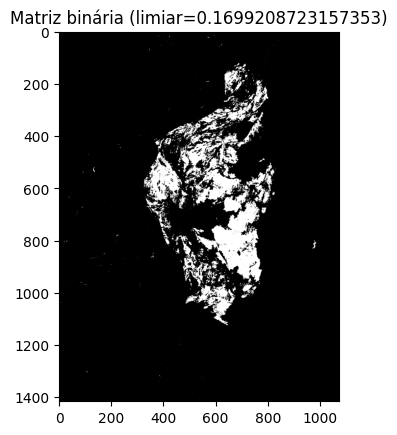

In [272]:
# Aplicar um limiar: valores maiores que limiar viram 1, menores ou iguais viram 0.
threshold = valor_pixel  # escolha seu valor
binary_matrix_ndvi = (diff_ndvi >= threshold).astype(np.uint8)

# Exibir a matriz binária.
plt.figure()
plt.imshow(binary_matrix_ndvi, cmap='gray')
plt.title(f"Matriz binária (limiar={threshold})")
plt.show()


### NBR

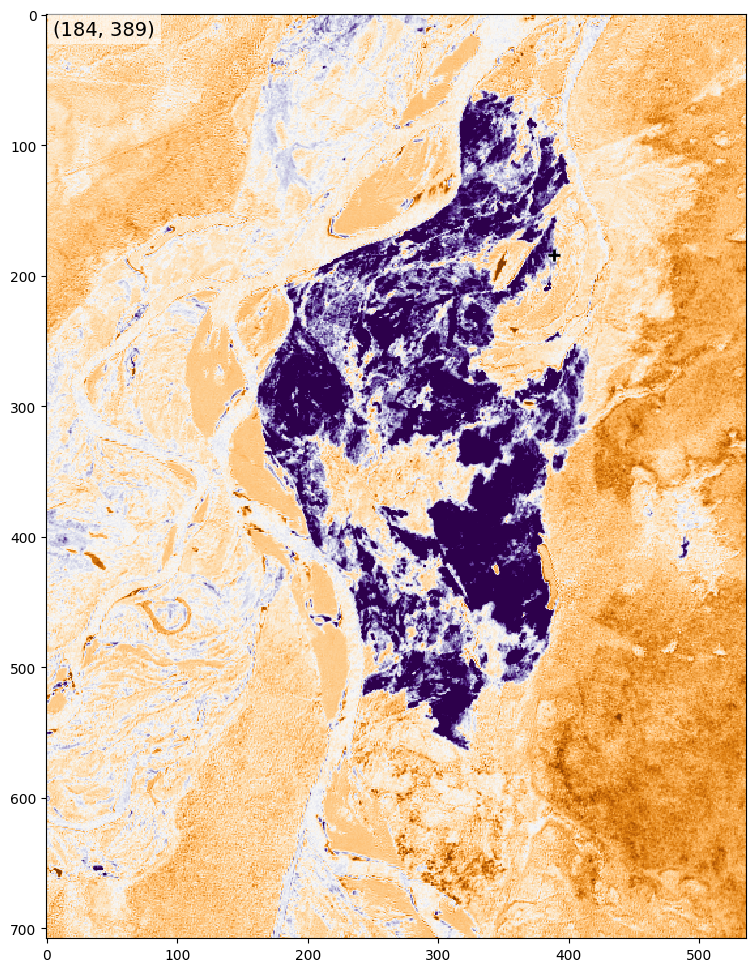

Valor NBR no pixel (linha=184, coluna=389): 0.16005677114133654


In [293]:
# Se diff_nbr ainda for 1D, garanta que ele já foi convertido para 2D antes daqui.

fig, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(
    diff_nbr,
    cmap="PuOr",
    vmin=-0.15,
    vmax=0.25,
    interpolation='nearest'
)

ax.set_xlabel("")
ax.set_ylabel("")

# Marcar um pixel específico (linha, coluna) com um 'X'
linha_alvo_nbr, coluna_alvo_nbr = 184, 389

ax.plot(coluna_alvo_nbr, linha_alvo_nbr, marker='+', color='black',
        markersize=9, markeredgewidth=2)

# Adicionar legenda das coordenadas (canto superior esquerdo)
ax.text(
    5, 15,                             # posição em pixels dentro da imagem
    f"({linha_alvo_nbr}, {coluna_alvo_nbr})",  # texto exibido
    color="black",
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')  # fundo discreto
)

plt.show()

# Obter valor do pixel
valor_pixel = diff_nbr[linha_alvo_nbr, coluna_alvo_nbr]
print(f"Valor NBR no pixel (linha={linha_alvo_nbr}, coluna={coluna_alvo_nbr}): {valor_pixel}")


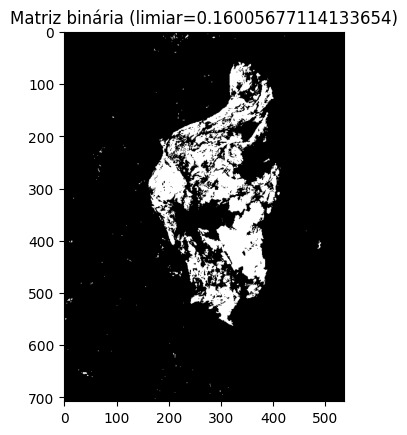

In [294]:
# Aplicar um limiar: valores maiores que limiar viram 1, menores ou iguais viram 0.
threshold = valor_pixel  # escolha seu valor
binary_matrix_nbr = (diff_nbr >= threshold).astype(np.uint8)

# Exibir a matriz binária.
plt.figure()
plt.imshow(binary_matrix_nbr, cmap='gray')
plt.title(f"Matriz binária (limiar={threshold})")
plt.show()


### NBR SWIR

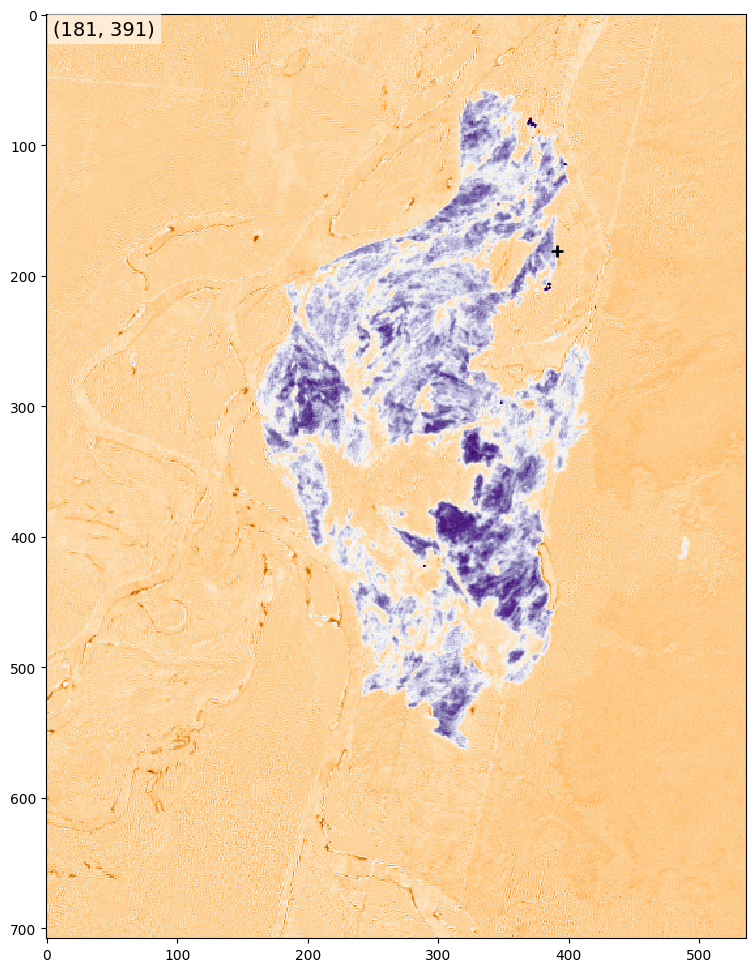

Valor NBR-SWIR no pixel (linha=181, coluna=391): 0.05781137479780444


In [305]:
# Se diff_nbr ainda for 1D, garanta que ele já foi convertido para 2D antes daqui.

fig, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(
    diff_nbrswir,
    cmap="PuOr",
    vmin=-0.15,
    vmax=0.25,
    interpolation='nearest'
)

ax.set_xlabel("")
ax.set_ylabel("")

# Marcar um pixel específico (linha, coluna) com um 'X'
linha_alvo_nbrswir, coluna_alvo_nbrswir = 181, 391

ax.plot(coluna_alvo_nbrswir, linha_alvo_nbrswir, marker='+', color='black',
        markersize=9, markeredgewidth=2)

# Adicionar legenda das coordenadas (canto superior esquerdo)
ax.text(
    5, 15,                             # posição em pixels dentro da imagem
    f"({linha_alvo_nbrswir}, {coluna_alvo_nbrswir})",  # texto exibido
    color="black",
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')  # fundo discreto
)

plt.show()

# Obter valor do pixel
valor_pixel = diff_nbrswir[linha_alvo_nbrswir, coluna_alvo_nbrswir]
print(f"Valor NBR-SWIR no pixel (linha={linha_alvo_nbrswir}, coluna={coluna_alvo_nbrswir}): {valor_pixel}")


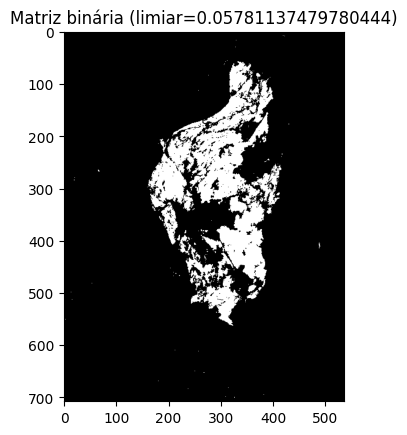

In [306]:
# Aplicar um limiar: valores maiores que limiar viram 1, menores ou iguais viram 0.
threshold = valor_pixel  # escolha seu valor
binary_matrix_nbrswir = (diff_nbrswir >= threshold).astype(np.uint8)

# Exibir a matriz binária.
plt.figure()
plt.imshow(binary_matrix_nbrswir, cmap='gray')
plt.title(f"Matriz binária (limiar={threshold})")
plt.show()


## Salvando  

In [ ]:
# carregue o dataset
df = pd.read_csv("Imagens_e_indices/coordenadas_e_informacoes_cenas_usadas.csv")

col = "Coordenadas_pixel(linha-coluna)_ndvi"
if col not in df.columns:
    df[col] = ""

col = "Coordenadas_pixel(linha-coluna)_nbr"
if col not in df.columns:
    df[col] = ""

col = "Coordenadas_pixel(linha-coluna)_nbrswir"
if col not in df.columns:
    df[col] = ""

df.iloc[linha, df.columns.get_loc("Coordenadas_pixel(linha-coluna)_ndvi")] = f"{linha_alvo_ndvi}-{coluna_alvo_ndvi}"
df.iloc[linha, df.columns.get_loc("Coordenadas_pixel(linha-coluna)_nbr")] = f"{linha_alvo_nbr}-{coluna_alvo_nbr}"
df.iloc[linha, df.columns.get_loc("Coordenadas_pixel(linha-coluna)_nbrswir")] = f"{linha_alvo_nbrswir}-{coluna_alvo_nbrswir}"

# salvar posição do pixel escolhido como limiar de incendio
df.to_csv("Imagens_e_indices/coordenadas_e_informacoes_cenas_usadas.csv", index=False)


np.savez(f"Imagens_e_indices/Image[{linha}]/Image[{linha}]_GroundTruth.npz",  # salvando arquivo contendo as matrizes binárias de cada índice
          nbr=binary_matrix_nbr,
          ndvi=binary_matrix_ndvi,
          nbrswir=binary_matrix_nbrswir
          )